## **Milestone 1**

**Context**

Recently the sale of used cars in the Indian market has been increasing relative to the sale of new vehicles.
Some owners have begun to purchase a used vehicle to replace their old vehicle rather than buying something new.
Unlike the new vehicle the price of used vehicles is less well understood and varies greatly.
In order for the market to work effectively and continue to expand it would be helpful if the price of a used 
car could be calculated given a set of commonly available information about the vehicle.

**The objectives:**

 Come up with a pricing model that can effectively predict the price of used cars
  and can help the business in devising profitable strategies using differential pricing.

**The key questions:**

What are the key variables determining the price of a used car?
What is the relative strength of each on the final predicted price?
Are there any conclusions that can be drawn from the final model which will aid in the sale of used cars?



**The problem formulation**:

Given a set of known used car prices can we build a regression model which accurately predicts those prices 
using a combination of variables related to the car being sold.

## **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM.

**Fuel_Type** : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car. (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC.

**Power** : The maximum power of the engine in bhp.

**Seats** : The number of seats in the car.

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook will give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they wish to explore different techniques. 

# **Milestone 1** 

### **Loading libraries**

In [1]:
#Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

### **Let us load the data**

In [2]:
data = pd.read_csv("used_cars.csv")

### **Understand the data by observing a few rows**

In [3]:
# View first 5 rows
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [4]:
# View last 5 rows Hint: Use tail() method
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


 **Observations and Insights: **
 
The vehicles appear to have a variety of models with different characteristics but it is important to note 
not all have sale prices and some of the vehicles are also missing their price when new.

### **Let us check the data types and and missing values of each column** 

In [5]:
# Check the datatypes of each column. Hint: Use info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [6]:
# Check total number of missing values of each column. Hint: Use isnull() method
data.isnull().sum().to_frame('nulls')

,nulls
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46


**Observations and Insights: **

There are 9 numerical variables and 5 object type.
The first eight variables have no nulls while mileage, engine, power and seats have a small number.
Price and new price have a significant number of nulls. The number of missing new prices is so high it may not be 
a useable variable.

We can observe that `S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence it can be dropped.

In [7]:
# Remove S.No. column from data. Hint: Use inplace = True
data.drop(columns='S.No.',inplace=True)

## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [8]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price
count,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000
mean,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.280417,22.779692,9.479468
std,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.809277,27.759344,11.187917
min,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,3.910000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,7.885000,3.500000
50%,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,11.570000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000


**Observations and Insights: **

    The vehicles range from models from 1996-2019, with average vehicle from 2013.
    Average price is 9.5 with most between 3.5&10.
    Most vehicles seat 5 although 2 and 10 seat vehicles are present in the data.
    The average mileage is 18 with small variation between 15-21 for most vehicles although max is 33. 
    We also noticed that kilometers driven appears to have extreme high outliers.
    The data indicates efficient vehicles are a priority in India both in seating and mileage.

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [9]:
# Explore basic summary statistics of categorical variables. Hint: Use the argument include=['object'] 
data.select_dtypes(include=['object']).describe()

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,7253,7253,7253,7253,7253
unique,2041,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,55,949,3852,5204,5952


**Number of unique observations in each category**

In [10]:
cat_cols=data.select_dtypes(include=['object']).columns

for column in cat_cols:
    print("For column:",column)
    print(data[column].nunique())
    print('-'*50)

For column: Name
2041
--------------------------------------------------
For column: Location
11
--------------------------------------------------
For column: Fuel_Type
5
--------------------------------------------------
For column: Transmission
2
--------------------------------------------------
For column: Owner_Type
4
--------------------------------------------------


**Observations and Insights: **

    The cars have many different models but come from 11 locations with Mumbai being the most common 
    There are more manual transmissions than automatic and diesel is the most common fuel type.
    The most common Owner_Type is first 

**Think About It**: 

- We could observe from summary statistics that kilometers_driven has extreme values. Can we look at the manufactured year for cars with extreme values for kilometers_driven? 
- Also, we could observe the feature mileage has values zero. Can the mileage of a car be zero?

**Let's explore the two points mentioned above**

**Check Kilometers_Driven extreme values**

In [11]:
#Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values(by='Kilometers_Driven',ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


#### **Observations and Insights: _____**


In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [12]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
data.drop(2328,inplace=True)

**Check Mileage extreme values**

In [13]:
#Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values(by='Mileage',ascending=True).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [14]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.

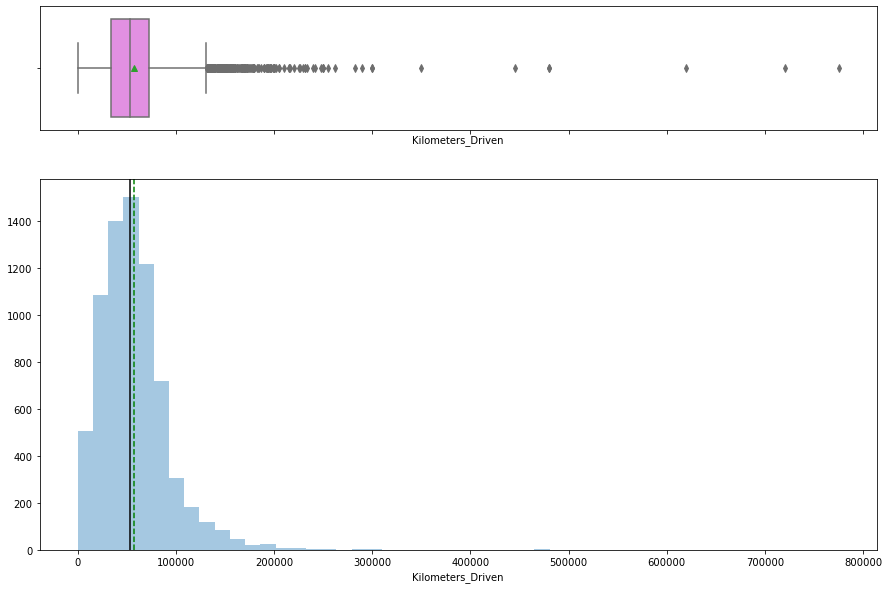

In [15]:
#Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

**Think About It**: Kilometers_Driven is highly right-skewed. Can we use Log transformation of the feature to reduce/remove the skewness? Why can't we keep skewed data?

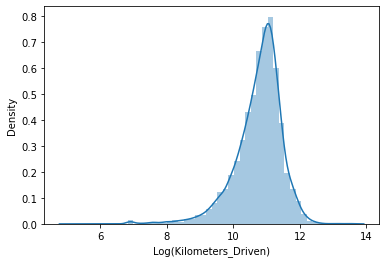

In [16]:
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel="Log(Kilometers_Driven)");

**Observations and Insights: **

    The log transformed kilometers driven is close to normal and we can now use it having accounted
    for the skewness in the variable

In [17]:
### We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**

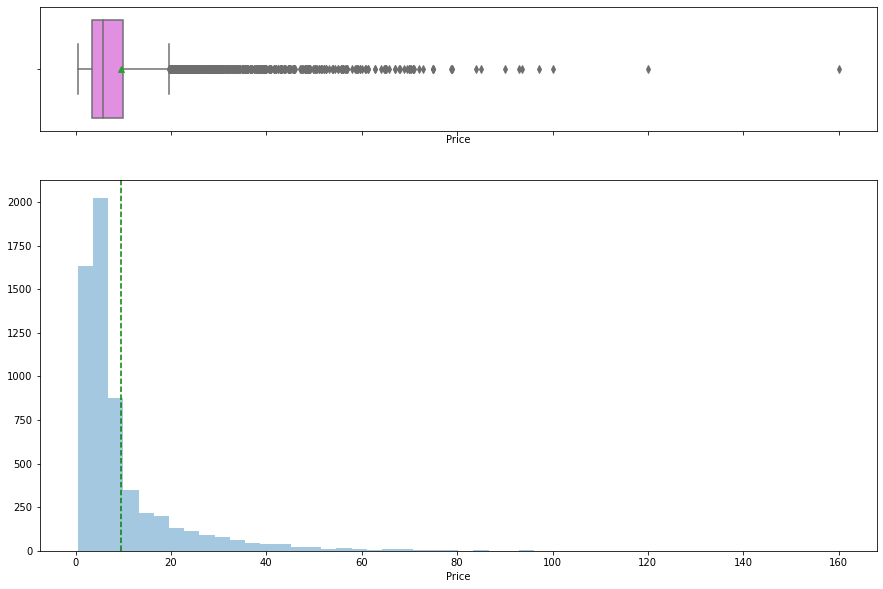

In [18]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data['Price'])

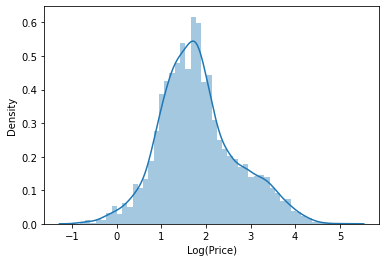

In [19]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(data["Price"]), axlabel="Log(Price)");

In [20]:
# We can Add a transformed Price feature in data
data["price_log"] = np.log(data["Price"])

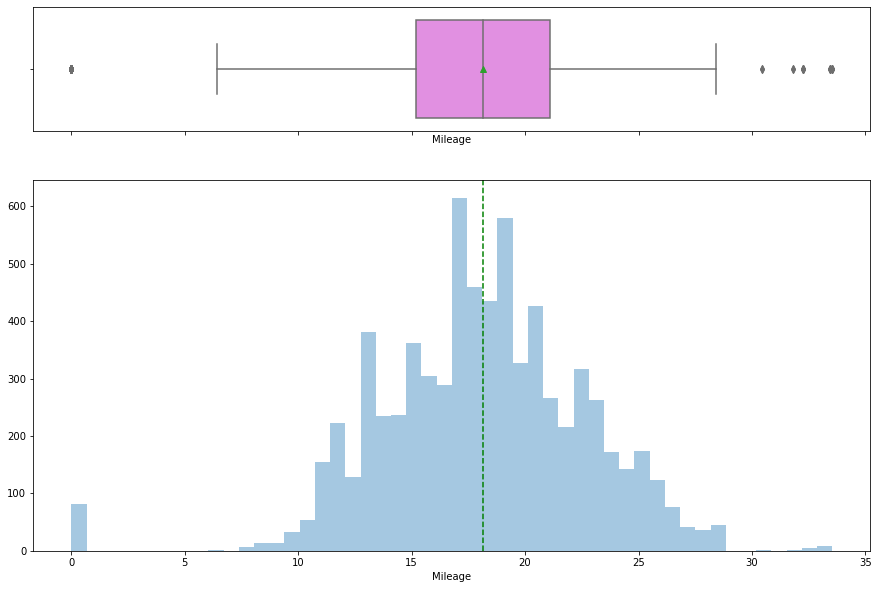

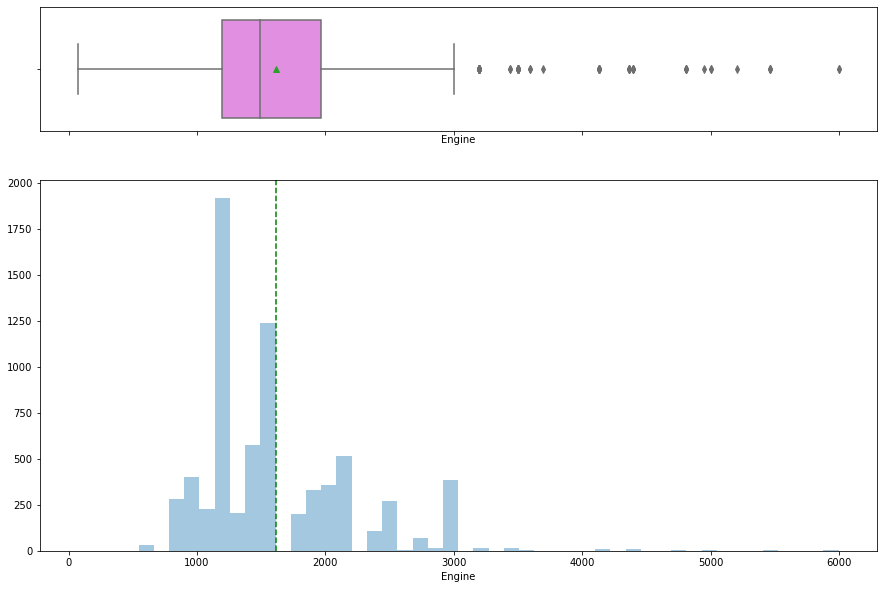

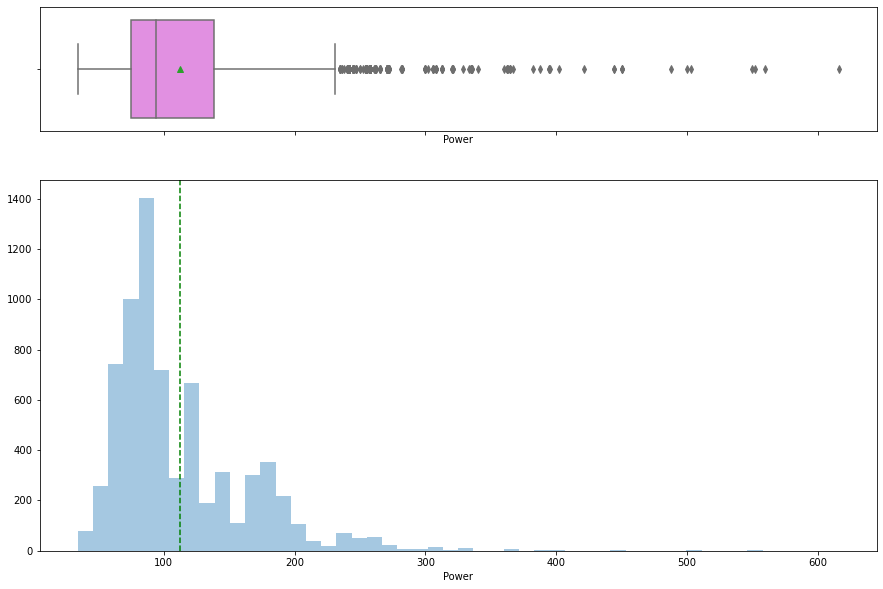

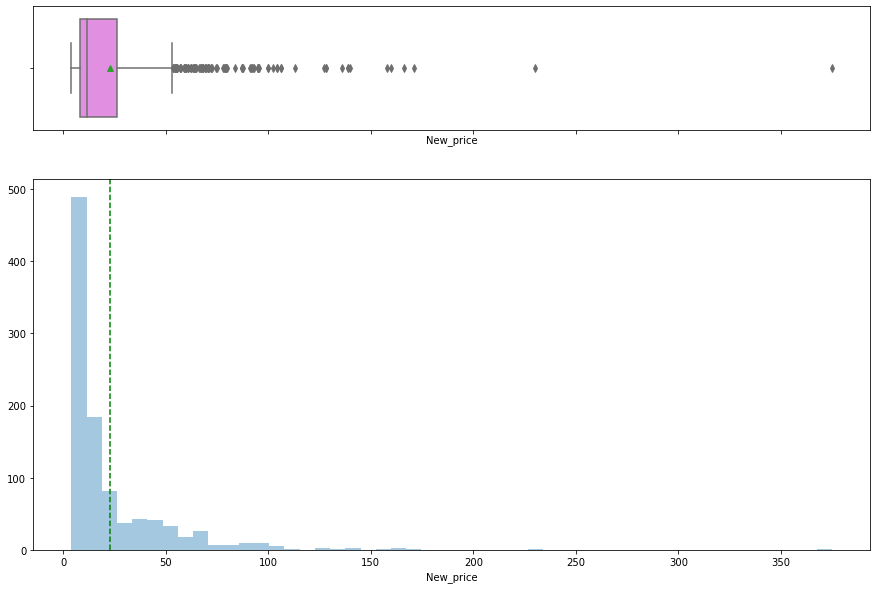

In [21]:
#Histograms and boxplots of other numerical variables
#histogram_boxplot(data['Year'])
histogram_boxplot(data['Mileage'])
histogram_boxplot(data['Engine'])
histogram_boxplot(data['Power'])
histogram_boxplot(data['New_price'])

We note that engine and power are also strongly skewed and will need to be transformed as well.
Mileage is relatively normal and can be left alone for now.

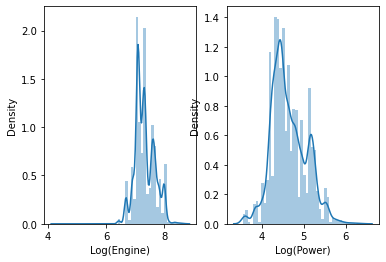

In [22]:
#Log transformation of engine and power 
fig,ax=plt.subplots(1,2)
sns.distplot(np.log(data["Engine"]),ax=ax[0], axlabel="Log(Engine)");
sns.distplot(np.log(data["Power"]),ax=ax[1], axlabel="Log(Power)");

In [23]:
data["engine_log"] = np.log(data["Engine"])
data["power_log"] = np.log(data["Power"])

#### **Note:** Try plotting histogram and box-plot for different numerical features and understand how the data looks like.

 **Observations and Insights for all the plots: **
 
        After looking at the variables we performed log transformations on
        kilometers driven,price,engine, and power to remove skewness.
        We will use those new variables when we perform the regression and build the model.


## **2. Univariate analysis - Categorical Data**

In [24]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired',order = data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    
    plt.show() # show the plot

#### Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.

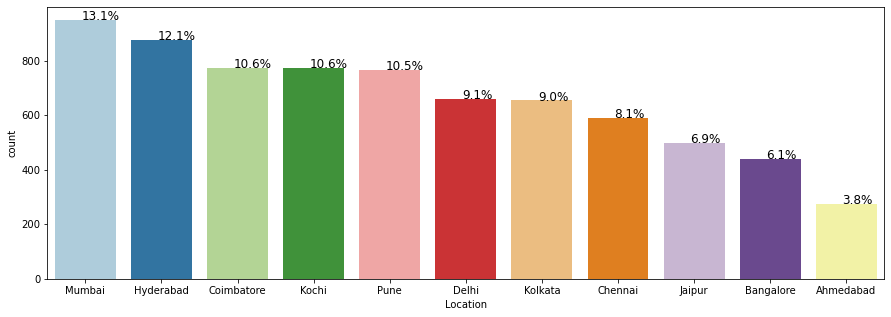

In [25]:
#Bar Plot for 'Location'
perc_on_bar('Location')

#### **Note:** Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type`

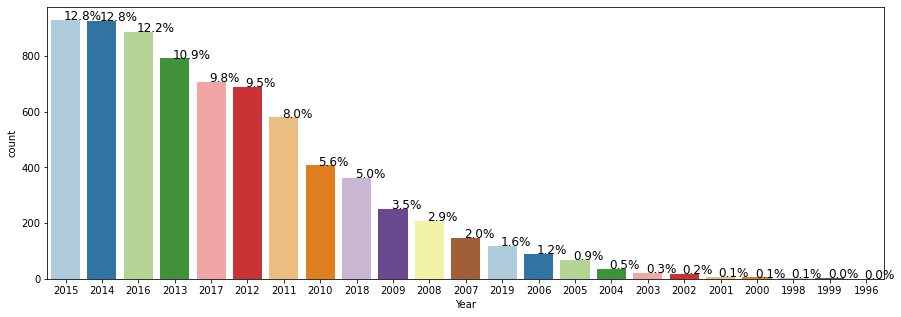

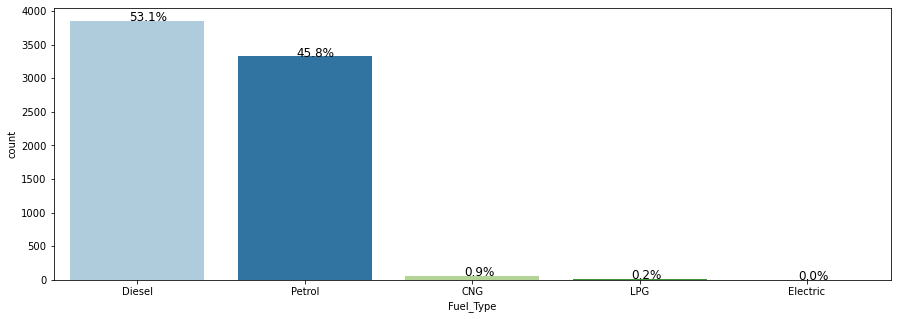

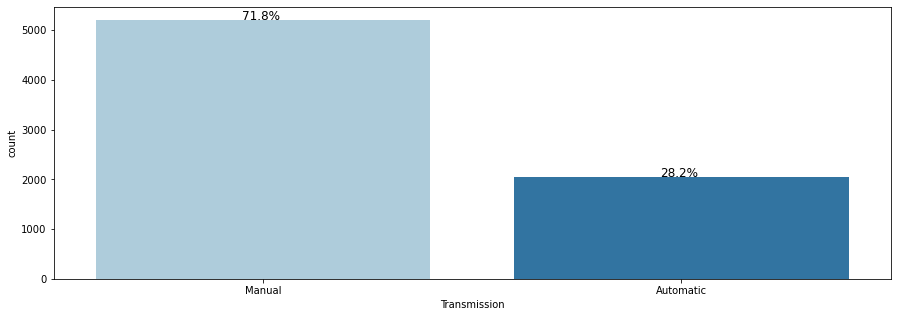

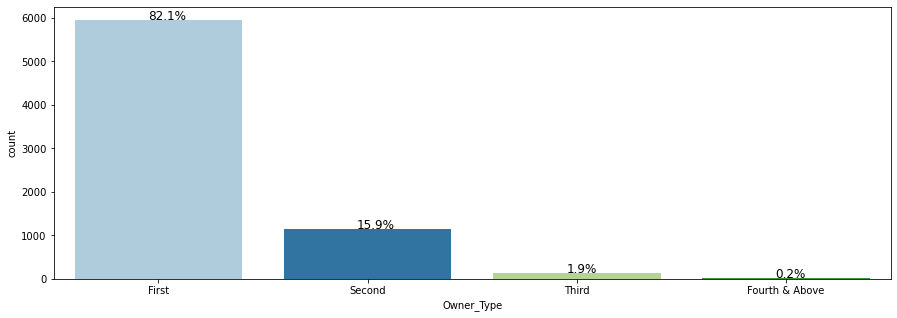

In [26]:
#Barplots for the other categorical variables
perc_on_bar('Year')
perc_on_bar('Fuel_Type')
perc_on_bar('Transmission')
perc_on_bar('Owner_Type')

 **Observations and Insights from all plots: **
        
        We can see that 2014-2016 are the most common years 
        Diesel and petrol make up for 99% of the vehicles with diesel somewhat more common 
        Almost 3/4 of the cars are manual vs automatic 
        Most of the owners,82%,are first time with some 15% second time and hardly any third and fourth time owners

## **Bivariate Analysis**

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables. 

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

<AxesSubplot:xlabel='price_log'>

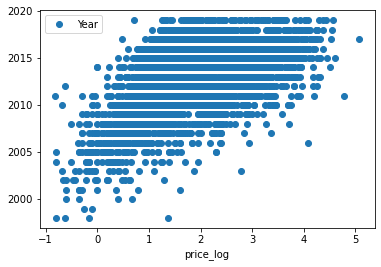

In [27]:
#Let us plot pair plot for the variables 'year' and 'price_log'
data.plot(x='price_log', y='Year', style='o')

array([[<AxesSubplot:xlabel='Year', ylabel='Year'>,
        <AxesSubplot:xlabel='Kilometers_Driven', ylabel='Year'>,
        <AxesSubplot:xlabel='Mileage', ylabel='Year'>,
        <AxesSubplot:xlabel='Engine', ylabel='Year'>,
        <AxesSubplot:xlabel='Power', ylabel='Year'>,
        <AxesSubplot:xlabel='Seats', ylabel='Year'>,
        <AxesSubplot:xlabel='New_price', ylabel='Year'>,
        <AxesSubplot:xlabel='Price', ylabel='Year'>,
        <AxesSubplot:xlabel='kilometers_driven_log', ylabel='Year'>,
        <AxesSubplot:xlabel='price_log', ylabel='Year'>,
        <AxesSubplot:xlabel='engine_log', ylabel='Year'>,
        <AxesSubplot:xlabel='power_log', ylabel='Year'>],
       [<AxesSubplot:xlabel='Year', ylabel='Kilometers_Driven'>,
        <AxesSubplot:xlabel='Kilometers_Driven', ylabel='Kilometers_Driven'>,
        <AxesSubplot:xlabel='Mileage', ylabel='Kilometers_Driven'>,
        <AxesSubplot:xlabel='Engine', ylabel='Kilometers_Driven'>,
        <AxesSubplot:xlabel='Power', y

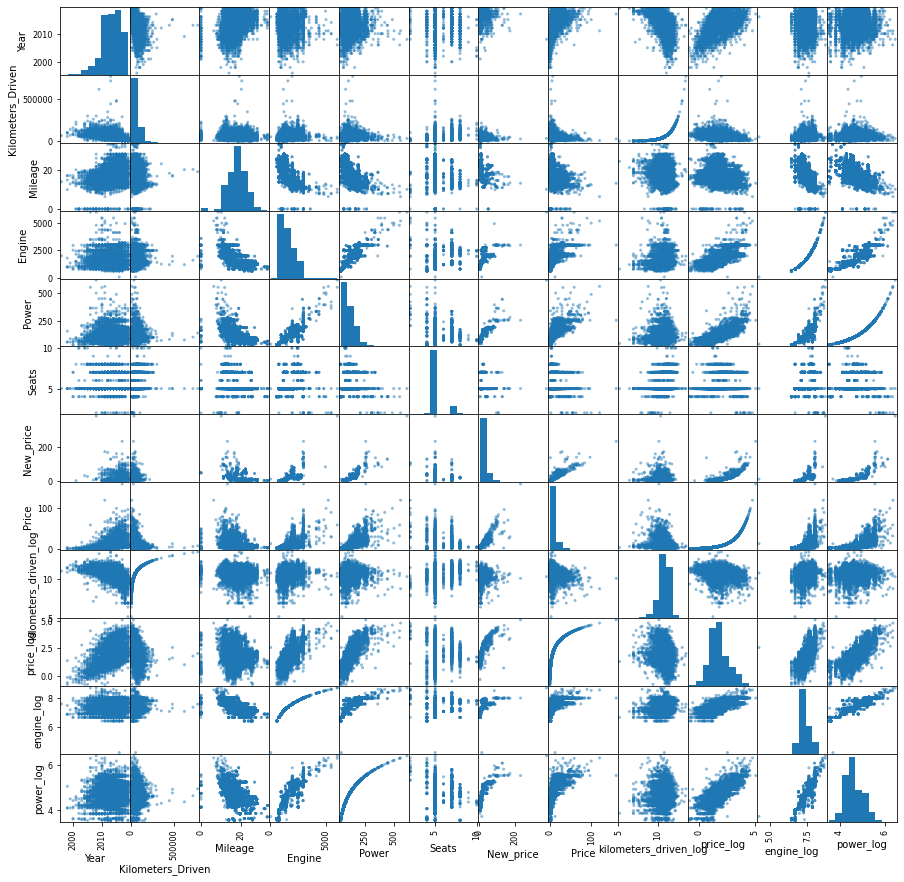

In [28]:
pd.plotting.scatter_matrix(data,figsize=(15,15))

<b>Note:</b> Try to explore different combinations of independent variables and dependent variable. Understand the relationship between all variables.

**Observations and Insights from all plots: **

    We can see that there is an inverse relationship between power and mileage
    Price_log has a positive linear relationship with engine_log and power_log 
    The relationship between year and price_log is also positive since new cars are more expensive 
    Also we see that kilometers_driven_log is inversely related to the price_log
        but there is some dispersion making a tight linear relationship less clear 

### **2. Heat map**
Heat map shows a 2D correlation matrix between two discrete features

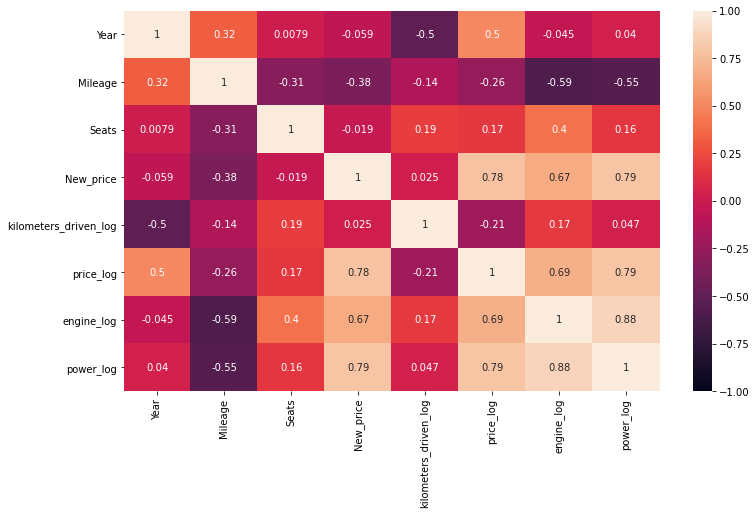

In [29]:
#We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Price','Kilometers_Driven','Engine','Power'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

**Observations and Insights: **
    
    Mileage is iinversely correlated to the logs of power and engine 
    There is a weak negative relationship between the logs of price and kilometers driven
    Price has a strong positive relationship with both power and engine 
    Year and mileage also have a moderate positive correlation
    

### **3. Box plot**

In [30]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    plt.figure(figsize=(12, 5)) #setting size of boxplot
    sns.boxplot(x=z, y=data['Price']) # defining x and y
    plt.show()
    plt.figure(figsize=(12, 5))
    plt.title('Without Outliers')
    sns.boxplot(x=z, y=data['Price'],showfliers=False) #turning off the outliers
    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

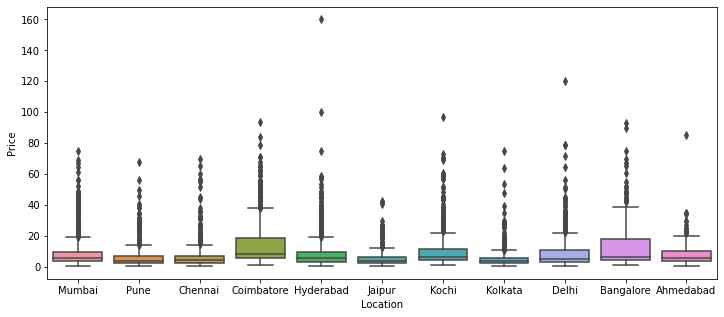

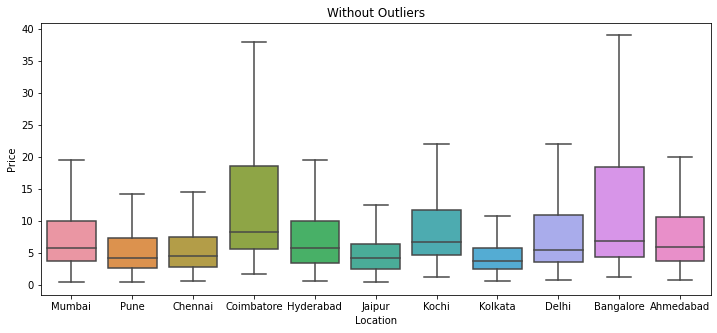

In [31]:
#Box Plot:Price vs Location
boxplot(data['Location'])

<b>Note: </b> Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.

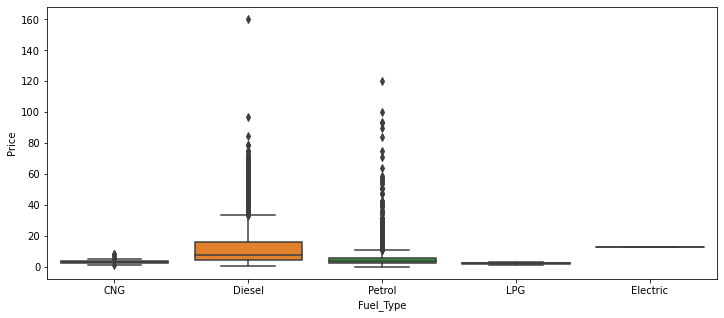

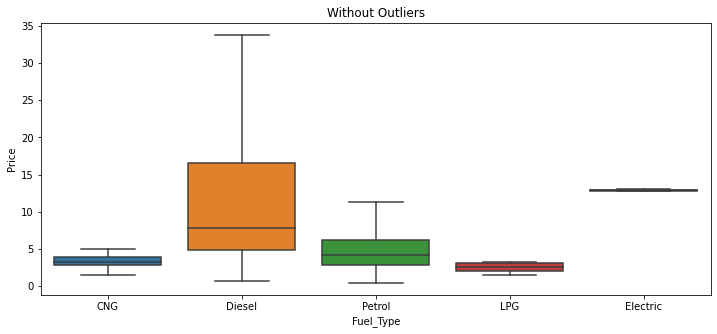

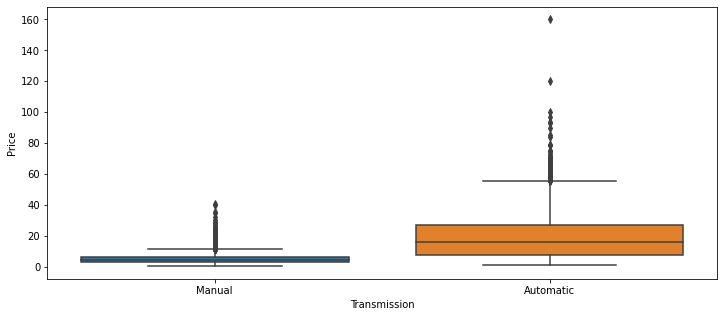

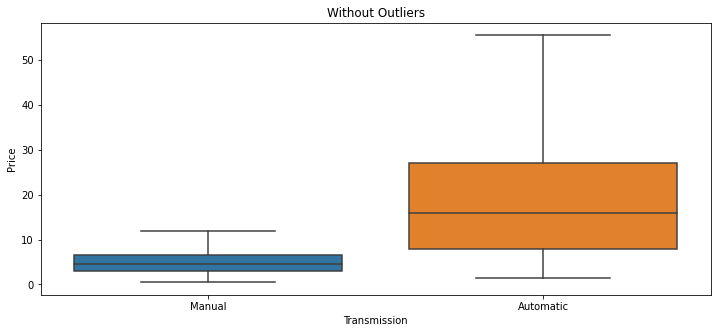

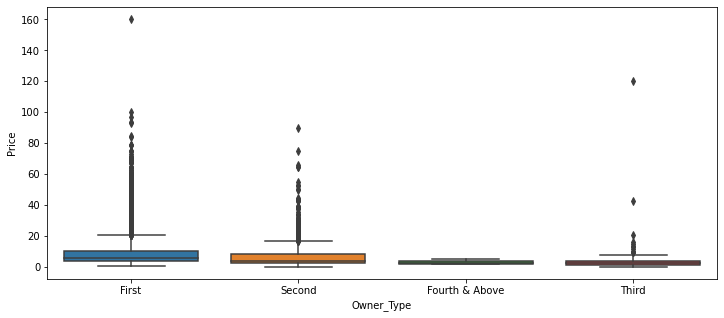

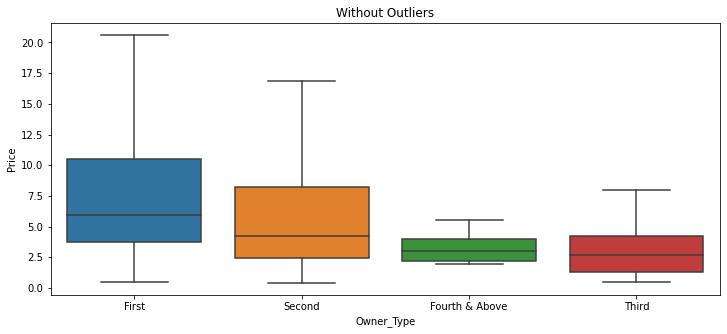

In [32]:
boxplot(data['Fuel_Type'])
boxplot(data['Transmission'])
boxplot(data['Owner_Type'])

**Observations and Insights for all plots**

    We can see automatic vehicles are more expensive as are first owner vehicles 
    Diesel vehicles are the most expensive followed by petrol vehicles.

### **Feature engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [33]:
#Splitting name into brand and model
data["Brand"] = data["Name"].apply(lambda x: x.split(" ")[0].lower())
data["Model"] = data["Name"].apply(lambda x: x.split(" ")[1].lower())

In [34]:
#dropping name and checking new dataframe
data2=data.drop(['Name'],axis=1)
data2.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,engine_log,power_log,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616,6.905753,4.063198,maruti,wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729,7.366445,4.837868,hyundai,creta
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077,7.089243,4.485260,honda,jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759,7.129298,4.485936,maruti,ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822,7.584773,4.947340,audi,a4


In [35]:
num_brands=data2['Brand'].nunique()
num_models=data2['Model'].nunique()
print("There are ",num_brands," unique vehicle brands and ",num_models," unique models.")

There are  32  unique vehicle brands and  218  unique models.


 **Observations and Insights: **
 
        By eliminating the name variable and creating the brand and model variable we can get more use out of 
        this data as there are only 32 unique brands and 218 models rather than the original several thousand.

### **Missing value treatment**

In [36]:
# Now check the missing values of each column. Hint: Use isnull() method
data2=data2.drop(['Kilometers_Driven','Engine','Power'],axis=1)
data2.isnull().sum().to_frame('current_missing')

,current_missing
Location,0
Year,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Seats,53
New_price,6246
Price,1234
kilometers_driven_log,0


 **Observations and Insights: **
        
        We still have several variables with a high number of missing values that we can address using the brand 
        and models variable as a proxy for similar vehicles 

**Missing values in Seats**

In [37]:
# Checking missing values in the column 'Seats'
data2[data2['Seats'].isnull()]

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,New_price,Price,kilometers_driven_log,price_log,engine_log,power_log,Brand,Model
194,Ahmedabad,2007,Petrol,Manual,First,0.00,NaN,NaN,2.95,11.002200,1.081805,NaN,NaN,honda,city
208,Kolkata,2010,Petrol,Manual,First,16.10,NaN,NaN,2.11,10.645449,0.746688,NaN,NaN,maruti,swift
229,Bangalore,2015,Diesel,Manual,First,0.00,NaN,NaN,3.60,11.162460,1.280934,7.311886,4.59512,ford,figo
733,Chennai,2006,Petrol,Manual,Third,16.10,NaN,NaN,1.75,11.490680,0.559616,NaN,NaN,maruti,swift
749,Mumbai,2008,Diesel,Automatic,Second,0.00,NaN,NaN,26.50,10.915107,3.277145,NaN,NaN,land,rover
1294,Delhi,2009,Petrol,Manual,First,12.80,NaN,NaN,3.20,10.915179,1.163151,NaN,NaN,honda,city
1327,Hyderabad,2015,Petrol,Manual,First,16.10,NaN,NaN,5.80,10.825661,1.757858,NaN,NaN,maruti,swift
1385,Pune,2004,Petrol,Manual,Second,0.00,NaN,NaN,1.50,11.652687,0.405465,NaN,NaN,honda,city
1460,Coimbatore,2008,Petrol,Manual,First,0.00,NaN,NaN,40.88,11.142992,3.710641,NaN,NaN,land,rover
1917,Jaipur,2005,Petrol,Manual,Second,13.00,NaN,NaN,1.70,11.385092,0.530628,7.308543,4.60517,honda,city


In [38]:
print('Before imputation there are',data2['Seats'].isnull().sum(),'missing values.')

Before imputation there are 53 missing values.


**Think about it:** Can we somehow use the extracted information from 'Name' column to impute missing values?

**Hint:** Impute these missing values one by one, by taking median number of seats for the particular car, using the Brand and Model name


In [39]:
def median_impute(var):
    median_var = data2.groupby(
# Select the columns to group
     ['Brand', 'Model']
# Select the desired column
)[var] .transform(
# transform all values in group to the column’s median
     'median')
# fill in values
    data2[var] = data2[var].fillna(median_var)


In [40]:
median_impute('Seats')

In [41]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
print('After imputation there are',data2['Seats'].isnull().sum(),'missing values.')

After imputation there are 3 missing values.


In [42]:
data[data['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,engine_log,power_log,Brand,Model
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,2.95,11.002200,1.081805,NaN,NaN,honda,city
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,2.11,10.645449,0.746688,NaN,NaN,maruti,swift
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.00,1498.0,99.0,NaN,NaN,3.60,11.162460,1.280934,7.311886,4.59512,ford,figo
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,NaN,1.75,11.490680,0.559616,NaN,NaN,maruti,swift
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,NaN,26.50,10.915107,3.277145,NaN,NaN,land,rover
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,NaN,3.20,10.915179,1.163151,NaN,NaN,honda,city
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,5.80,10.825661,1.757858,NaN,NaN,maruti,swift
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,NaN,1.50,11.652687,0.405465,NaN,NaN,honda,city
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,40.88,11.142992,3.710641,NaN,NaN,land,rover
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493.0,100.0,NaN,NaN,1.70,11.385092,0.530628,7.308543,4.60517,honda,city


In [43]:
data2["Seats"] = data2["Seats"].fillna(5.0)

In [44]:
print('After imputation there are',data2['Seats'].isnull().sum(),'missing values.')

After imputation there are 0 missing values.


**Missing values for Mileage**

In [45]:
# Now check missing values of each column. Hint: Use isnull() method
data2[data2['Mileage'].isnull()]


,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,New_price,Price,kilometers_driven_log,price_log,engine_log,power_log,Brand,Model
4446,Chennai,2016,Electric,Automatic,First,NaN,5.0,13.58,13.00,10.819778,2.564949,4.276666,3.713572,mahindra,e
4904,Mumbai,2011,Electric,Automatic,First,NaN,5.0,NaN,12.75,10.691945,2.545531,7.494430,4.290459,toyota,prius


In [46]:
print('Before imputation there are',data2['Mileage'].isnull().sum(),'missing values.')

Before imputation there are 2 missing values.


In [47]:
# Impute missing Mileage. For example use can use median or any other methods.
data2["Mileage"].fillna(data2['Mileage'].median(),inplace=True)

In [48]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
print('After imputation there are',data2['Mileage'].isnull().sum(),'missing values.')

After imputation there are 0 missing values.


**Missing values for Engine**

In [49]:
#displaying missing values of engine_log
data2[data2['engine_log'].isnull()]

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,New_price,Price,kilometers_driven_log,price_log,engine_log,power_log,Brand,Model
194,Ahmedabad,2007,Petrol,Manual,First,0.00,5.0,NaN,2.95,11.002200,1.081805,NaN,NaN,honda,city
208,Kolkata,2010,Petrol,Manual,First,16.10,5.0,NaN,2.11,10.645449,0.746688,NaN,NaN,maruti,swift
733,Chennai,2006,Petrol,Manual,Third,16.10,5.0,NaN,1.75,11.490680,0.559616,NaN,NaN,maruti,swift
749,Mumbai,2008,Diesel,Automatic,Second,0.00,5.0,NaN,26.50,10.915107,3.277145,NaN,NaN,land,rover
1294,Delhi,2009,Petrol,Manual,First,12.80,5.0,NaN,3.20,10.915179,1.163151,NaN,NaN,honda,city
1327,Hyderabad,2015,Petrol,Manual,First,16.10,5.0,NaN,5.80,10.825661,1.757858,NaN,NaN,maruti,swift
1385,Pune,2004,Petrol,Manual,Second,0.00,5.0,NaN,1.50,11.652687,0.405465,NaN,NaN,honda,city
1460,Coimbatore,2008,Petrol,Manual,First,0.00,5.0,NaN,40.88,11.142992,3.710641,NaN,NaN,land,rover
2074,Pune,2011,Petrol,Manual,First,16.10,5.0,NaN,3.15,10.096378,1.147402,NaN,NaN,maruti,swift
2096,Coimbatore,2004,Petrol,Manual,First,0.00,5.0,NaN,1.93,10.861803,0.657520,NaN,NaN,hyundai,santro


In [50]:
print('Before imputation there are',data2['engine_log'].isnull().sum(),'missing values.')

Before imputation there are 46 missing values.


In [51]:
data2["engine_log"].fillna(data2['engine_log'].median(),inplace=True)

In [52]:
print('After imputation there are',data2['engine_log'].isnull().sum(),'missing values.')

After imputation there are 0 missing values.


**Missing values for Power**

In [53]:
#displaying missing values of power_log
data2[data2['power_log'].isnull()]

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,New_price,Price,kilometers_driven_log,price_log,engine_log,power_log,Brand,Model
76,Jaipur,2008,Diesel,Manual,First,17.80,5.0,NaN,2.00,11.618285,0.693147,7.243513,NaN,ford,fiesta
79,Hyderabad,2005,Petrol,Manual,First,0.00,5.0,NaN,1.30,11.380434,0.262364,6.990257,NaN,hyundai,santro
89,Hyderabad,2007,Petrol,Manual,First,17.00,5.0,NaN,2.10,11.208368,0.741937,6.990257,NaN,hyundai,santro
120,Mumbai,2005,Petrol,Manual,Second,17.00,5.0,NaN,0.85,11.532728,-0.162519,6.990257,NaN,hyundai,santro
143,Kochi,2008,Petrol,Manual,Third,17.00,5.0,NaN,1.67,11.299225,0.512824,6.990257,NaN,hyundai,santro
194,Ahmedabad,2007,Petrol,Manual,First,0.00,5.0,NaN,2.95,11.002200,1.081805,7.308543,NaN,honda,city
208,Kolkata,2010,Petrol,Manual,First,16.10,5.0,NaN,2.11,10.645449,0.746688,7.308543,NaN,maruti,swift
227,Delhi,2013,Diesel,Manual,First,17.80,5.0,NaN,4.10,10.757903,1.410987,7.129298,NaN,maruti,swift
245,Mumbai,2007,Petrol,Manual,Third,17.00,5.0,NaN,0.95,11.184421,-0.051293,6.990257,NaN,hyundai,santro
262,Hyderabad,2006,Petrol,Manual,First,0.00,5.0,NaN,1.75,11.502875,0.559616,6.990257,NaN,hyundai,santro


In [54]:
print('Before imputation there are',data2['power_log'].isnull().sum(),'missing values.')

Before imputation there are 175 missing values.


In [55]:
median_impute('power_log')

In [56]:
print('After imputation there are',data2['power_log'].isnull().sum(),'missing values.')

After imputation there are 12 missing values.


In [57]:
data2['power_log']=data2['power_log'].fillna(data2['power_log'].median())

In [58]:
print('After imputation there are',data2['power_log'].isnull().sum(),'missing values.')

After imputation there are 0 missing values.


**Missing values for New_price**

In [59]:
#displaying missing values of New_price
data2[data2['New_price'].isnull()]

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,New_price,Price,kilometers_driven_log,price_log,engine_log,power_log,Brand,Model
0,Mumbai,2010,CNG,Manual,First,26.60,5.0,NaN,1.75,11.184421,0.559616,6.905753,4.063198,maruti,wagon
1,Pune,2015,Diesel,Manual,First,19.67,5.0,NaN,12.50,10.621327,2.525729,7.366445,4.837868,hyundai,creta
3,Chennai,2012,Diesel,Manual,First,20.77,7.0,NaN,6.00,11.373663,1.791759,7.129298,4.485936,maruti,ertiga
4,Coimbatore,2013,Diesel,Automatic,Second,15.20,5.0,NaN,17.74,10.613246,2.875822,7.584773,4.947340,audi,a4
5,Hyderabad,2012,LPG,Manual,First,21.10,5.0,NaN,2.35,11.225243,0.854415,6.701960,4.010963,hyundai,eon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Hyderabad,2011,Diesel,Manual,First,20.54,5.0,NaN,NaN,11.400999,NaN,7.376508,4.640537,volkswagen,vento
7249,Mumbai,2015,Petrol,Automatic,First,17.21,5.0,NaN,NaN,10.985293,NaN,7.087574,4.640537,volkswagen,polo
7250,Kolkata,2012,Diesel,Manual,First,23.08,5.0,NaN,NaN,10.239960,NaN,7.286876,4.144721,nissan,micra
7251,Pune,2013,Petrol,Automatic,Third,17.20,5.0,NaN,NaN,10.864025,NaN,7.087574,4.640537,volkswagen,polo


In [60]:
print('Before imputation there are',data2['New_price'].isnull().sum(),'missing values.')

Before imputation there are 6246 missing values.


In [61]:
median_impute('New_price')

In [62]:
print('After imputation there are',data2['New_price'].isnull().sum(),'missing values.')

After imputation there are 1511 missing values.


In [63]:
data2=data2.dropna(subset=['Price'])

**Observations for missing values after imputing: **
    
    After imputing by the median we were able to eliminate all the missing values for all variables except 
    New_price which still has 1511 missing values. As this is almost 20% of the data 
    it is not clear if it will be usable.

## **Proposed approach**

- **Potential techniques -** What different techniques should be explored?
 We will build a regression model but we should examine how many independent variables to include only adding 
    those that add value to the model. 
- **Overall solution design -** What is the potential solution design?
 Linear regression should be used since we are predicting a value rather than a yes/no. We will add variables
    only if the addition results in higher adjusted R squared.
- **Measures of success -** What are the key measures of success? 
We wish to maximize the adjusted R squared of the final model and we may want to test it is accurate on a set of test data. We could possibly break the data into training and test groups to see if predictions of prices are accurate.

# **Milestone 2**

## **Model Building**

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like - Name 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split Data**

<li>Step1: Split the data into X and Y . 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

<b>Think about it:</b> Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

In [64]:
#Reviewing current dataset
data2.describe()

,Year,Mileage,Seats,New_price,Price,kilometers_driven_log,price_log,engine_log,power_log
count,6018.000000,6018.000000,6018.000000,4774.000000,6018.000000,6018.000000,6018.000000,6018.000000,6018.000000
mean,2013.357594,18.135329,5.277999,22.403929,9.470243,10.757961,1.824705,7.330615,4.631449
std,3.269677,4.581823,0.803837,25.116950,11.165926,0.713022,0.873606,0.339192,0.416222
min,1998.000000,0.000000,2.000000,3.910000,0.440000,5.141664,-0.820981,4.276666,3.532226
25%,2011.000000,15.170000,5.000000,7.880000,3.500000,10.434116,1.252763,7.088409,4.304065
50%,2014.000000,18.160000,5.000000,11.685000,5.640000,10.878047,1.729884,7.308543,4.530984
75%,2016.000000,21.100000,5.000000,24.010000,9.950000,11.198215,2.297573,7.585281,4.927978
max,2019.000000,33.540000,10.000000,230.000000,160.000000,13.560618,5.075174,8.699181,6.327937


In [65]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6018 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               6018 non-null   object 
 1   Year                   6018 non-null   int64  
 2   Fuel_Type              6018 non-null   object 
 3   Transmission           6018 non-null   object 
 4   Owner_Type             6018 non-null   object 
 5   Mileage                6018 non-null   float64
 6   Seats                  6018 non-null   float64
 7   New_price              4774 non-null   float64
 8   Price                  6018 non-null   float64
 9   kilometers_driven_log  6018 non-null   float64
 10  price_log              6018 non-null   float64
 11  engine_log             6018 non-null   float64
 12  power_log              6018 non-null   float64
 13  Brand                  6018 non-null   object 
 14  Model                  6018 non-null   object 
dtypes: f

In [66]:
# Step-1
X = data2.drop(['Price','price_log','New_price','Brand','Model'],axis=1)
y = data2[['price_log','Price']]

In [67]:
# Step-2 Use pd.get_dummies(drop_first=True)
dummies = ['Location','Fuel_Type', 'Transmission', 'Owner_Type' ]

X = pd.get_dummies(data = X, columns= dummies, drop_first= True)
X.head()

,Year,Mileage,Seats,kilometers_driven_log,engine_log,power_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,26.60,5.0,11.184421,6.905753,4.063198,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,2015,19.67,5.0,10.621327,7.366445,4.837868,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,2011,18.20,5.0,10.736397,7.089243,4.485260,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,2012,20.77,7.0,11.373663,7.129298,4.485936,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,2013,15.20,5.0,10.613246,7.584773,4.947340,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [68]:

from statsmodels.graphics.gofplots import ProbPlot

# import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# import library for preparing data
from sklearn.model_selection import train_test_split

# import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

In [69]:
# Step-3 Splitting data into training and test set:
X_train, X_test, y_train,y_test =train_test_split(X, y, test_size=.3, random_state=1)
print(X_train.shape, X_test.shape)

(4212, 24) (1806, 24)


In [70]:
print(y_train.shape, y_test.shape)

(4212, 2) (1806, 2)


In [71]:
# Let us write a function for calculating r2_score and RMSE on train and test data.
# This function takes model as an input on which we have trained particular algorithm.
#the categorical column as the input and returns the boxplots and histograms for the variable.
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_train_ = np.exp(pred_train)
    pred_test = model.predict(X_test)
    pred_test_ = np.exp(pred_test)
    
    train_r2=metrics.r2_score(y_train['Price'],pred_train_)
    test_r2=metrics.r2_score(y_test['Price'],pred_test_)
    train_rmse=metrics.mean_squared_error(y_train['Price'],pred_train_,squared=False)
    test_rmse=metrics.mean_squared_error(y_test['Price'],pred_test_,squared=False)
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train['Price'],pred_train_))
        print("R-square on test set : ",metrics.r2_score(y_test['Price'],pred_test_))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train['Price'],pred_train_)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test['Price'],pred_test_)))
    
    # returning the list with train and test scores
    return score_list

<hr>

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### **Fitting a linear model**

Linear Regression can be implemented using: <br>

**1) Sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
**2) Statsmodels:** https://www.statsmodels.org/stable/regression.html

In [72]:
# import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [73]:
# Create a linear regression model
lr = LinearRegression()

In [74]:
X_train.reset_index()
y_train.reset_index()

,index,price_log,Price
0,2116,0.765468,2.15
1,2769,0.559616,1.75
2,1518,1.704748,5.50
3,3783,1.824549,6.20
4,685,1.266948,3.55
...,...,...,...
4207,905,1.047319,2.85
4208,5193,1.423108,4.15
4209,3981,2.174752,8.80
4210,235,2.977568,19.64


In [75]:
# Fit linear regression model
lr.fit(X_train,y_train['price_log']) 

LinearRegression()

In [76]:
# Get score of the model.
LR_score = get_model_score(lr)

R-sqaure on training set :  0.8262111273433445
R-square on test set :  0.7931916980089196
RMSE on training set :  4.657600676898445
RMSE on test set :  5.068312933012277


**Observations from results: The Rsquared of this model is moderate at 82%. On the positive side 
it doesn't drop on the test set but stays about the same at 79%. We may be able to improve on this model.**

#### **Important variables of Linear Regression**

Building a model using statsmodels

In [77]:
# Add constant for test and train
x_train = sm.add_constant(X_train)

# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train['price_log'], train)
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1380.
Date:                Sun, 17 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:49:46   Log-Likelihood:                -788.32
No. Observations:                4212   AIC:                             1627.
Df Residuals:                    4187   BIC:                             1785.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [78]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns=['coef'])
olsmod['pval']=olsmodel1.pvalues

In [79]:
# FIlter by significant p-value (pval <0.05) and sort descending by Odds ratio
olsmod = olsmod.sort_values(by="pval", ascending=False)
pval_filter = olsmod['pval']<=0.05
olsmod[pval_filter]

,coef,pval
Location_Mumbai,-0.059746,2.203505e-02
Fuel_Type_Electric,0.967651,1.141458e-03
Owner_Type_Third,-0.122026,2.976286e-04
Location_Coimbatore,0.141046,1.460843e-07
Owner_Type_Second,-0.069578,1.402167e-07
Location_Bangalore,0.181715,7.937059e-10
Location_Hyderabad,0.162925,4.929900e-10
Fuel_Type_Petrol,-0.312265,2.537994e-10
engine_log,0.264982,9.871923e-11
Mileage,-0.010873,5.946012e-11


In [80]:
# we are looking are overall significant varaible
pval_filter = olsmod['pval']<=0.05
imp_vars = olsmod[pval_filter].index.tolist()

# we are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)
 

start = '\033[1m'
end = '\033[95m'
sig_var=[e for e in sig_var if e not in ('engine_log','kilometers_driven_log','power_log')]
print(start+'Most overall significant categorical varaibles of LINEAR REGRESSION  are '+end,':\n',sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Location', 'Fuel_Type', 'Owner_Type', 'Mileage', 'Transmission', 'Year']


<b>Build Ridge / Lasso Regression similar to Linear Regression:</b><br>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [81]:
# import Ridge/ Lasso Regression from sklearn
from sklearn.linear_model import Ridge

In [82]:
# Create a Ridge regression model
ridge=Ridge(alpha=.01,normalize=True)

In [83]:
# Fit Ridge regression model.
ridge.fit(x_train,y_train)

Ridge(alpha=0.01, normalize=True)

In [84]:
# Get score of the model.
ridge.score(x_test,y_test)

0.7700323982425972

# Observations
The OLS model has an improvement in explained variation over our first model as the adjusted R squared is .88.
The accuracy score of the ridge model with alpha of .01 is slightly worse at .77 but this a high level of precision.

### **Decision Tree** 

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [85]:
# import Decision tree for Regression from sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [86]:
# Create a decision tree regression model
dtree = DecisionTreeRegressor(random_state=1)

In [87]:
# Fit decision tree regression model.
dtree.fit(X_train,y_train['price_log'])

DecisionTreeRegressor(random_state=1)

In [88]:
# Get score of the model.
Dtree_model = get_model_score(dtree)

R-sqaure on training set :  0.9999965696959587
R-square on test set :  0.7888102775732686
RMSE on training set :  0.020692719736775493
RMSE on test set :  5.121719937424506


#### **Observations from results:
We can see the tree has overfit to the training data as the Rsquared 
dropped from 99% on the training set to 78% on the testing set. The RMSE also increases dramatically.**

Print the importance of features in the tree building ( The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )


In [89]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
power_log                  6.394574e-01
Year                       2.352690e-01
engine_log                 3.959191e-02
Mileage                    1.973011e-02
kilometers_driven_log      1.967467e-02
Seats                      6.954466e-03
Location_Kolkata           5.869039e-03
Transmission_Manual        5.722468e-03
Fuel_Type_Petrol           4.088727e-03
Fuel_Type_Diesel           3.711242e-03
Location_Hyderabad         3.293380e-03
Owner_Type_Second          2.439210e-03
Location_Coimbatore        2.403884e-03
Location_Mumbai            1.859654e-03
Location_Delhi             1.731576e-03
Location_Bangalore         1.646946e-03
Owner_Type_Third           1.614895e-03
Location_Jaipur            1.575540e-03
Location_Chennai           1.467220e-03
Location_Pune              1.094015e-03
Location_Kochi             7.724429e-04
Owner_Type_Fourth & Above  3.148393e-05
Fuel_Type_LPG              6.989645e-07
Fuel_Type_Electric         0.000000e+00


#### **Observations and insights:
The power and year of the car are very important to the price 
according to the tree with everything else having little importance. This must be looked at again once 
we address the overfitting.**

### **Random Forest**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [93]:
# import Randomforest for Regression from sklearn
from sklearn.ensemble import RandomForestRegressor

In [94]:
# Create a Randomforest regression model 
randomForest=RandomForestRegressor(random_state=7)

In [95]:
# Fit Randomforest regression model.
randomForest.fit(X_train,y_train['price_log'])

RandomForestRegressor(random_state=7)

In [96]:
# Get score of the model.
rf_model=get_model_score(randomForest)

R-sqaure on training set :  0.9700180461946362
R-square on test set :  0.8622471221005099
RMSE on training set :  1.934555677903934
RMSE on test set :  4.136469035629169


#### **Observations and insights: 
The random forest is still overfit to the training set but less so the 
decision tree as the Rsquared of the test set is higher at 86%. The RMSE is still different from training to test
data but less dramatically different than the tree. We can make further improvement by tuning the data.**

**Feature Importance**

In [97]:
# Print important features similar to decision trees
print(pd.DataFrame(randomForest.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
power_log                  0.633584
Year                       0.236805
engine_log                 0.038448
kilometers_driven_log      0.022791
Mileage                    0.020828
Transmission_Manual        0.008205
Seats                      0.006830
Location_Kolkata           0.005816
Location_Hyderabad         0.003540
Fuel_Type_Petrol           0.002875
Fuel_Type_Diesel           0.002724
Location_Coimbatore        0.002519
Owner_Type_Second          0.002257
Location_Delhi             0.001857
Location_Mumbai            0.001857
Location_Bangalore         0.001697
Location_Jaipur            0.001655
Location_Pune              0.001578
Owner_Type_Third           0.001277
Location_Chennai           0.001233
Location_Kochi             0.001184
Fuel_Type_Electric         0.000380
Owner_Type_Fourth & Above  0.000045
Fuel_Type_LPG              0.000014


#### **Observations and insights:
As in the tree we see that power and year are the most important features by a wide margin.
Engine, kilometers driven and mileage have small but still relevant importance **

### **Hyperparameter Tuning: Decision Tree**

In [106]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
    
# Choose the type of classifier 
d_tree_tuned = DecisionTreeRegressor(random_state=7)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,10), 
              'splitter': ['best','random'],
              'criterion': [ 'mse'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - mse
scorer = metrics.make_scorer(mean_squared_error)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the tree to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
d_tree_tuned.fit(X_train,y_train['price_log'])

DecisionTreeRegressor(max_depth=2, min_samples_leaf=5, random_state=7,
                      splitter='random')

In [115]:
#from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import GridSearchCV
    
# Choose the type of classifier 
d_tree_tuned = DecisionTreeRegressor(random_state=7)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,5), 
              'splitter': ['best','random'],
              'criterion': [ 'mse'],
              'min_samples_leaf': np.arange(2,9)
             }

# Type of scoring used to compare parameter combinations - mse
scorer = metrics.make_scorer(mean_squared_error)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the tree to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
d_tree_tuned.fit(X_train,y_train['price_log'])

DecisionTreeRegressor(max_depth=2, min_samples_leaf=2, random_state=7,
                      splitter='random')

In [116]:
dtreetuned_model=get_model_score(d_tree_tuned)

R-sqaure on training set :  0.5304828926340178
R-square on test set :  0.5362461760727296
RMSE on training set :  7.655560247541575
RMSE on test set :  7.5896751727145375


**Observations and insights: 
The performance of the tuned decision tree appears to be worse than the untuned with lower Rsquared
and higher MSE. However we can note that the performances on both the train and test data is almost identical 
meaning that the model is more generalized.**

**Feature Importance**

In [117]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
power_log                  0.855074
Fuel_Type_Diesel           0.096611
Year                       0.048315
Location_Kolkata           0.000000
Owner_Type_Second          0.000000
Owner_Type_Fourth & Above  0.000000
Transmission_Manual        0.000000
Fuel_Type_Petrol           0.000000
Fuel_Type_LPG              0.000000
Fuel_Type_Electric         0.000000
Location_Pune              0.000000
Location_Mumbai            0.000000
Location_Kochi             0.000000
Mileage                    0.000000
Location_Jaipur            0.000000
Location_Hyderabad         0.000000
Location_Delhi             0.000000
Location_Coimbatore        0.000000
Location_Chennai           0.000000
Location_Bangalore         0.000000
engine_log                 0.000000
kilometers_driven_log      0.000000
Seats                      0.000000
Owner_Type_Third           0.000000


 **Observations and insights:
The power is by far the most important factor in the tuned tree at .86, with diesel fuel a small factor at .1
and the year even less important at .05. This may indicate in the data performance and age as well as utility
are primary factors determining the price of a used vehicle.**

### **Hyperparameter Tuning: Random Forest**

In [131]:
# Create the parameter grid
param_grid = {
    'bootstrap': [True],
    'max_depth': np.arange(2,5), 
    'criterion': [ 'mse'],
    'min_samples_leaf': np.arange(2,9),
    'n_estimators': np.arange(100,1000,100)
             }
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_obj = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 10)

grid_obj.fit(X_train, y_train['price_log'])


# Set the tree to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator_tuned.fit(X_train,y_train['price_log'])


Fitting 3 folds for each of 189 candidates, totalling 567 fits
[CV 1/3; 1/189] START bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=2, n_estimators=100
[CV 1/3; 1/189] END bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=2, n_estimators=100; total time=   1.9s
[CV 2/3; 1/189] START bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=2, n_estimators=100
[CV 2/3; 1/189] END bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=2, n_estimators=100; total time=   1.7s
[CV 3/3; 1/189] START bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=2, n_estimators=100
[CV 3/3; 1/189] END bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=2, n_estimators=100; total time=   1.7s
[CV 1/3; 2/189] START bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=2, n_estimators=200
[CV 1/3; 2/189] END bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=2, n_estimators=200; total time=   3.3s
[CV 2/3; 2/189] START bootstrap=True, cri

[CV 1/3; 13/189] END bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=3, n_estimators=400; total time=   6.9s
[CV 2/3; 13/189] START bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=3, n_estimators=400
[CV 2/3; 13/189] END bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=3, n_estimators=400; total time=   6.2s
[CV 3/3; 13/189] START bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=3, n_estimators=400
[CV 3/3; 13/189] END bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=3, n_estimators=400; total time=   6.4s
[CV 1/3; 14/189] START bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=3, n_estimators=500
[CV 1/3; 14/189] END bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=3, n_estimators=500; total time=   7.9s
[CV 2/3; 14/189] START bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=3, n_estimators=500
[CV 2/3; 14/189] END bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=3, n_estimator

[CV 2/3; 25/189] END bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=4, n_estimators=700; total time=  12.2s
[CV 3/3; 25/189] START bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=4, n_estimators=700
[CV 3/3; 25/189] END bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=4, n_estimators=700; total time=  12.4s
[CV 1/3; 26/189] START bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=4, n_estimators=800
[CV 1/3; 26/189] END bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=4, n_estimators=800; total time=  13.9s
[CV 2/3; 26/189] START bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=4, n_estimators=800
[CV 2/3; 26/189] END bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=4, n_estimators=800; total time=  14.0s
[CV 3/3; 26/189] START bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=4, n_estimators=800
[CV 3/3; 26/189] END bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=4, n_estimator

[CV 3/3; 37/189] END bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=6, n_estimators=100; total time=   1.9s
[CV 1/3; 38/189] START bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=6, n_estimators=200
[CV 1/3; 38/189] END bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=6, n_estimators=200; total time=   4.2s
[CV 2/3; 38/189] START bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=6, n_estimators=200
[CV 2/3; 38/189] END bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=6, n_estimators=200; total time=   3.7s
[CV 3/3; 38/189] START bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=6, n_estimators=200
[CV 3/3; 38/189] END bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=6, n_estimators=200; total time=   3.7s
[CV 1/3; 39/189] START bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=6, n_estimators=300
[CV 1/3; 39/189] END bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=6, n_estimator

[CV 1/3; 50/189] END bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=7, n_estimators=500; total time=  12.3s
[CV 2/3; 50/189] START bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=7, n_estimators=500
[CV 2/3; 50/189] END bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=7, n_estimators=500; total time=  12.9s
[CV 3/3; 50/189] START bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=7, n_estimators=500
[CV 3/3; 50/189] END bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=7, n_estimators=500; total time=  12.9s
[CV 1/3; 51/189] START bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=7, n_estimators=600
[CV 1/3; 51/189] END bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=7, n_estimators=600; total time=  15.5s
[CV 2/3; 51/189] START bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=7, n_estimators=600
[CV 2/3; 51/189] END bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=7, n_estimator

[CV 2/3; 62/189] END bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=8, n_estimators=800; total time=  15.5s
[CV 3/3; 62/189] START bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=8, n_estimators=800
[CV 3/3; 62/189] END bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=8, n_estimators=800; total time=  15.6s
[CV 1/3; 63/189] START bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=8, n_estimators=900
[CV 1/3; 63/189] END bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=8, n_estimators=900; total time=  17.3s
[CV 2/3; 63/189] START bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=8, n_estimators=900
[CV 2/3; 63/189] END bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=8, n_estimators=900; total time=  15.9s
[CV 3/3; 63/189] START bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=8, n_estimators=900
[CV 3/3; 63/189] END bootstrap=True, criterion=mse, max_depth=2, min_samples_leaf=8, n_estimator

[CV 3/3; 74/189] END bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=3, n_estimators=200; total time=   4.7s
[CV 1/3; 75/189] START bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=3, n_estimators=300
[CV 1/3; 75/189] END bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=3, n_estimators=300; total time=   7.2s
[CV 2/3; 75/189] START bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=3, n_estimators=300
[CV 2/3; 75/189] END bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=3, n_estimators=300; total time=   6.9s
[CV 3/3; 75/189] START bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=3, n_estimators=300
[CV 3/3; 75/189] END bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=3, n_estimators=300; total time=   7.3s
[CV 1/3; 76/189] START bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=3, n_estimators=400
[CV 1/3; 76/189] END bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=3, n_estimator

[CV 1/3; 87/189] END bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=4, n_estimators=600; total time=  19.1s
[CV 2/3; 87/189] START bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=4, n_estimators=600
[CV 2/3; 87/189] END bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=4, n_estimators=600; total time=  14.3s
[CV 3/3; 87/189] START bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=4, n_estimators=600
[CV 3/3; 87/189] END bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=4, n_estimators=600; total time=  14.3s
[CV 1/3; 88/189] START bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=4, n_estimators=700
[CV 1/3; 88/189] END bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=4, n_estimators=700; total time=  16.7s
[CV 2/3; 88/189] START bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=4, n_estimators=700
[CV 2/3; 88/189] END bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=4, n_estimator

[CV 2/3; 99/189] END bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=5, n_estimators=900; total time=  15.7s
[CV 3/3; 99/189] START bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=5, n_estimators=900
[CV 3/3; 99/189] END bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=5, n_estimators=900; total time=  15.4s
[CV 1/3; 100/189] START bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=6, n_estimators=100
[CV 1/3; 100/189] END bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=6, n_estimators=100; total time=   1.6s
[CV 2/3; 100/189] START bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=6, n_estimators=100
[CV 2/3; 100/189] END bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=6, n_estimators=100; total time=   1.6s
[CV 3/3; 100/189] START bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=6, n_estimators=100
[CV 3/3; 100/189] END bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=6, n_est

[CV 2/3; 111/189] END bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=7, n_estimators=300; total time=   4.9s
[CV 3/3; 111/189] START bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=7, n_estimators=300
[CV 3/3; 111/189] END bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=7, n_estimators=300; total time=   4.8s
[CV 1/3; 112/189] START bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=7, n_estimators=400
[CV 1/3; 112/189] END bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=7, n_estimators=400; total time=   6.1s
[CV 2/3; 112/189] START bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=7, n_estimators=400
[CV 2/3; 112/189] END bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=7, n_estimators=400; total time=   6.3s
[CV 3/3; 112/189] START bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=7, n_estimators=400
[CV 3/3; 112/189] END bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=7, n_

[CV 2/3; 123/189] END bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=8, n_estimators=600; total time=  13.7s
[CV 3/3; 123/189] START bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=8, n_estimators=600
[CV 3/3; 123/189] END bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=8, n_estimators=600; total time=  11.2s
[CV 1/3; 124/189] START bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=8, n_estimators=700
[CV 1/3; 124/189] END bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=8, n_estimators=700; total time=  12.4s
[CV 2/3; 124/189] START bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=8, n_estimators=700
[CV 2/3; 124/189] END bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=8, n_estimators=700; total time=  15.2s
[CV 3/3; 124/189] START bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=8, n_estimators=700
[CV 3/3; 124/189] END bootstrap=True, criterion=mse, max_depth=3, min_samples_leaf=8, n_

[CV 2/3; 135/189] END bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=2, n_estimators=900; total time=  21.8s
[CV 3/3; 135/189] START bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=2, n_estimators=900
[CV 3/3; 135/189] END bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=2, n_estimators=900; total time=  22.6s
[CV 1/3; 136/189] START bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=3, n_estimators=100
[CV 1/3; 136/189] END bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=3, n_estimators=100; total time=   1.9s
[CV 2/3; 136/189] START bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=3, n_estimators=100
[CV 2/3; 136/189] END bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=3, n_estimators=100; total time=   1.9s
[CV 3/3; 136/189] START bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=3, n_estimators=100
[CV 3/3; 136/189] END bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=3, n_

[CV 2/3; 147/189] END bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=4, n_estimators=300; total time=   5.8s
[CV 3/3; 147/189] START bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=4, n_estimators=300
[CV 3/3; 147/189] END bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=4, n_estimators=300; total time=   5.4s
[CV 1/3; 148/189] START bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=4, n_estimators=400
[CV 1/3; 148/189] END bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=4, n_estimators=400; total time=   8.0s
[CV 2/3; 148/189] START bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=4, n_estimators=400
[CV 2/3; 148/189] END bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=4, n_estimators=400; total time=   7.4s
[CV 3/3; 148/189] START bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=4, n_estimators=400
[CV 3/3; 148/189] END bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=4, n_

[CV 2/3; 159/189] END bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=5, n_estimators=600; total time=  11.4s
[CV 3/3; 159/189] START bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=5, n_estimators=600
[CV 3/3; 159/189] END bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=5, n_estimators=600; total time=  11.2s
[CV 1/3; 160/189] START bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=5, n_estimators=700
[CV 1/3; 160/189] END bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=5, n_estimators=700; total time=  12.9s
[CV 2/3; 160/189] START bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=5, n_estimators=700
[CV 2/3; 160/189] END bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=5, n_estimators=700; total time=  13.6s
[CV 3/3; 160/189] START bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=5, n_estimators=700
[CV 3/3; 160/189] END bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=5, n_

[CV 2/3; 171/189] END bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=6, n_estimators=900; total time=  16.5s
[CV 3/3; 171/189] START bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=6, n_estimators=900
[CV 3/3; 171/189] END bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=6, n_estimators=900; total time=  17.3s
[CV 1/3; 172/189] START bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=7, n_estimators=100
[CV 1/3; 172/189] END bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=7, n_estimators=100; total time=   1.9s
[CV 2/3; 172/189] START bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=7, n_estimators=100
[CV 2/3; 172/189] END bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=7, n_estimators=100; total time=   1.9s
[CV 3/3; 172/189] START bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=7, n_estimators=100
[CV 3/3; 172/189] END bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=7, n_

[CV 2/3; 183/189] END bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=8, n_estimators=300; total time=   5.0s
[CV 3/3; 183/189] START bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=8, n_estimators=300
[CV 3/3; 183/189] END bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=8, n_estimators=300; total time=   5.4s
[CV 1/3; 184/189] START bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=8, n_estimators=400
[CV 1/3; 184/189] END bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=8, n_estimators=400; total time=   6.8s
[CV 2/3; 184/189] START bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=8, n_estimators=400
[CV 2/3; 184/189] END bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=8, n_estimators=400; total time=   7.2s
[CV 3/3; 184/189] START bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=8, n_estimators=400
[CV 3/3; 184/189] END bootstrap=True, criterion=mse, max_depth=4, min_samples_leaf=8, n_

RandomForestRegressor(max_depth=4, min_samples_leaf=3, n_estimators=200)

In [133]:
#model score
rf_tuned_model=get_model_score(rf_estimator_tuned)

R-sqaure on training set :  0.7847512343609764
R-square on test set :  0.7505704431266957
RMSE on training set :  5.183482098616932
RMSE on test set :  5.5661306352227085


 **Observations and insights: 
        The hypertuned random forest has a reasonably good Rsquared of .78 on the training set
        which only slightly drops to .75 on the test set indicating that the model is not overfit.
        The RMSE also only changes slightly and is lower than the tuned decision tree.**

**Feature Importance**

In [134]:
# Print important features of tuned random forest similar to tuned decision trees
print(pd.DataFrame(rf_estimator_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
power_log                  0.737049
Year                       0.245221
engine_log                 0.011388
Transmission_Manual        0.003399
kilometers_driven_log      0.000811
Seats                      0.000711
Fuel_Type_Petrol           0.000481
Mileage                    0.000460
Fuel_Type_Diesel           0.000298
Owner_Type_Third           0.000171
Location_Delhi             0.000012
Location_Hyderabad         0.000000
Location_Jaipur            0.000000
Location_Kolkata           0.000000
Location_Mumbai            0.000000
Location_Pune              0.000000
Location_Coimbatore        0.000000
Fuel_Type_Electric         0.000000
Fuel_Type_LPG              0.000000
Location_Chennai           0.000000
Location_Bangalore         0.000000
Owner_Type_Fourth & Above  0.000000
Owner_Type_Second          0.000000
Location_Kochi             0.000000


**Observations and insights: 
    Power is the most important factor in the tuned random forest model by a large margin with an importance of .75.
    Year is the next most important factor with a value of .25. This result is similar to the tree with the 
    difference that use of diesel fuel is not important.**



In [137]:
# defining list of models ypu have trained
models = [lr,dtree,randomForest,d_tree_tuned,rf_estimator_tuned]

# defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train= []
rmse_test= []

# looping through all the models to get the rmse and r2 scores
for model in models:
    # accuracy score
    j = get_model_score(model,False)
    r2_train.append(j[0])
    r2_test.append(j[1])
    rmse_train.append(j[2])
    rmse_test.append(j[3])

In [138]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Decision Tree','Random Forest','Tuned Decision Tree','Tuned Random Forest'],
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE':rmse_train,'Test_RMSE':rmse_test}) 
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.826211,0.793192,4.657601,5.068313
1,Decision Tree,0.999997,0.788810,0.020693,5.121720
2,Random Forest,0.970018,0.862247,1.934556,4.136469
3,Tuned Decision Tree,0.530483,0.536246,7.655560,7.589675
4,Tuned Random Forest,0.784751,0.750570,5.183482,5.566131


 **Observations: 
            The Random forest regression model appears to be the best with the best Rsquared and lowest MSE
            The Decision tree is second closely followed by the the linear regression and the tuned random forest.
            The tuned decision tree appeared to have the worst performance.
            **

**Note:** You can also try some other algorithms such as kNN and compare the model performance with the existing ones

### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

      The data showed that the power and year of the vehicle were the most important factors in determining the price.
       We also saw that on all models most of the other factors such as seats or owner type were irrelevant 
    
####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

            The Random forest regression model appears to be the best with the best Rsquared and lowest MSE
            The Decision tree is second closely followed by the the linear regression and the tuned random forest.
            The tuned decision tree appeared to have the worst performance.
            It might be possible to use more advanced tuning techniques that might make the tuned random forest 
            perform better. Further cleaning or fine tuning of the data might also improve performance further.
            
####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

          I propose adopting the untuned random forest as it had the best performance. It also had a relatively fast 
            processing time compared to the tuned models which require more cpu time and power.
    
          If the tuned model performance could be improved it may be preferred but greater computing power would be
            required for regular use on new data.
            
####**Key recommendations for implementation**: 
- What are some key recommendations to implement the solutions? What should the implementation roadmap look like?
       
       To successfully implement this solution I would streamline the preprocessing and missing value treatment 
        so that new data can be more quickly entered into the model. I would save the created random forest model 
        as a pickle file that could be accessible to different departments or groups as needed. I would include 
        clear documentation so that others could understand it in its current state and make changes or improvements 
        as necessary.
        
-What further analysis needs to be done or what other associated problems need to be solved?
       
       As stated more advanced tuning techniques might allow the performance of the tuned random forest to warrant 
        its adoption but this would most likely need to be accompanied by greater computing power.
        
        To better model the price of used cars it may also be useful to analyze the consumers as well as the vehicles.
        This could be done using surveys at point of sale or online afterward and could allow the model to include 
        additional factors that may be affecting the price consumers are willing to pay for different used vehicles.